<a href="https://colab.research.google.com/github/Louis5228/Digital-Image-Process/blob/main/Color_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW4")

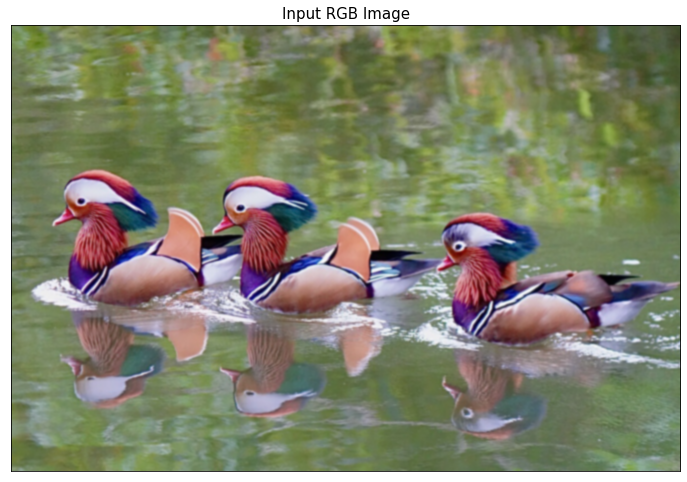

In [124]:
# load image
img = cv2.imread('Bird 3 blurred.tif')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.title('Input RGB Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(show_img)
plt.show()

In [118]:
## Calculate RGB components
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

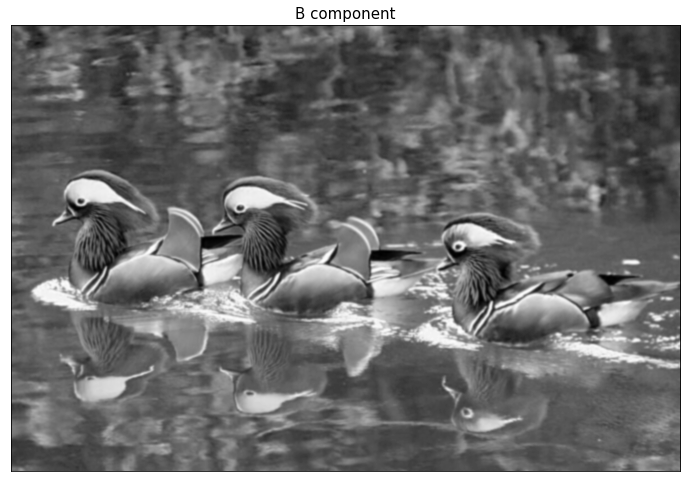

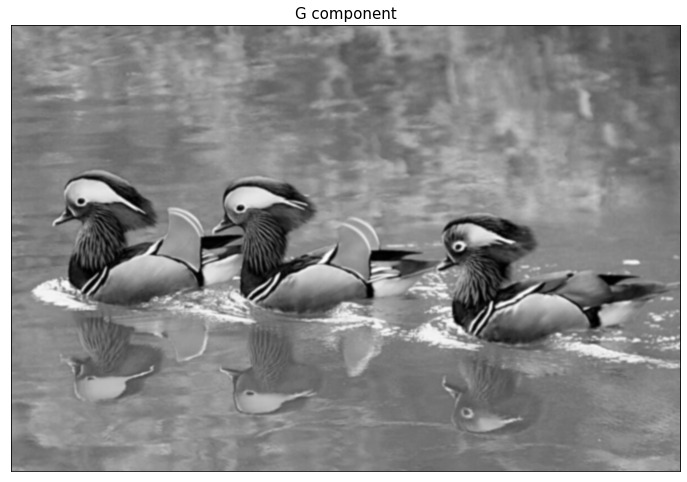

In [119]:
plt.figure(figsize=(12,12))
plt.title('B component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(b, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('G component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(g, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('R component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(r, cmap = 'gray')
plt.show()

In [ ]:
## Convert RGB to HSI
b_ = b / 255.0
g_ = g / 255.0
r_ = r / 255.0

hsi_img = np.copy(img)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):

    ## Calculate Hue
    num = 0.5 * ((r_[i][j] - g_[i][j]) + (r_[i][j] - b_[i][j]))
    den = math.sqrt((r_[i][j] - g_[i][j])**2 + ((r_[i][j] - b_[i][j]) * (g_[i][j] - b_[i][j])))
    theta = math.acos(num / den)
    if den == 0.0:
      H = 0
    elif b_[i][j] <= g_[i][j]:
      H = theta
    else:
      H = 2*math.pi - theta
    H = H / (2*math.pi)

    ## Calculate Saturation
    rgb_minimum = min(b_[i][j], g_[i][j], r_[i][j])
    sum = b_[i][j] + g_[i][j] + r_[i][j]
    if sum == 0:
      S = 0
    else:
      S = 1 - (3.0 / (r_[i][j] + g_[i][j] + b_[i][j]) * rgb_minimum)

    ## Calculate Intensity
    I = sum / 3.0
    
    hsi_img[i, j, 0] = H * 255.0
    hsi_img[i, j, 1] = S * 255.0
    hsi_img[i, j, 2] = I * 255.0

## Calculate HSI components
h = hsi_img[:,:,0]
s = hsi_img[:,:,1]
i = hsi_img[:,:,2]

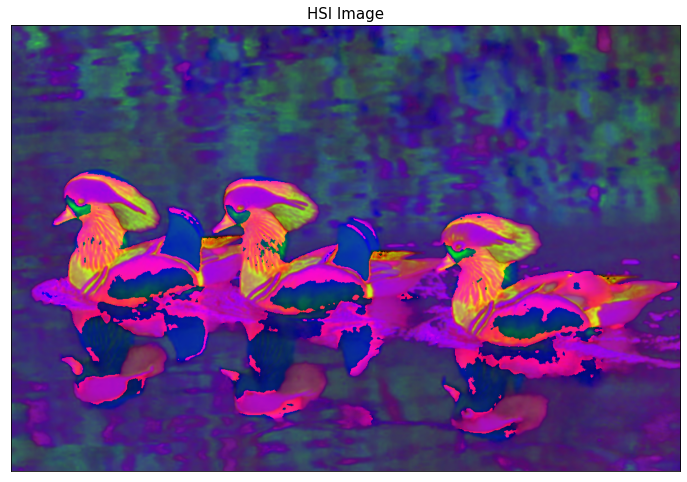

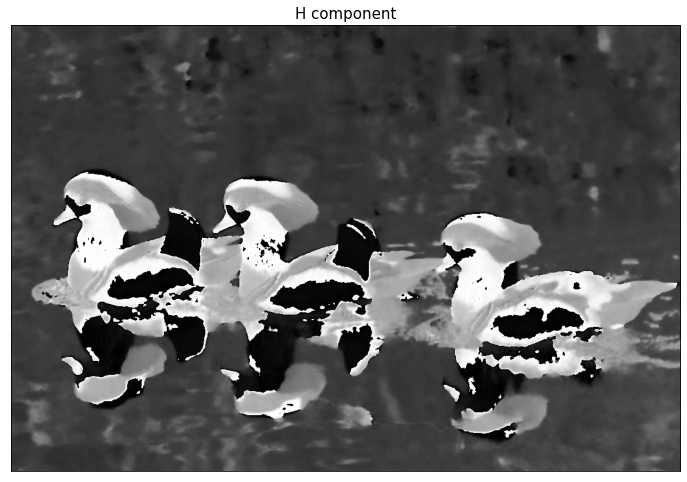

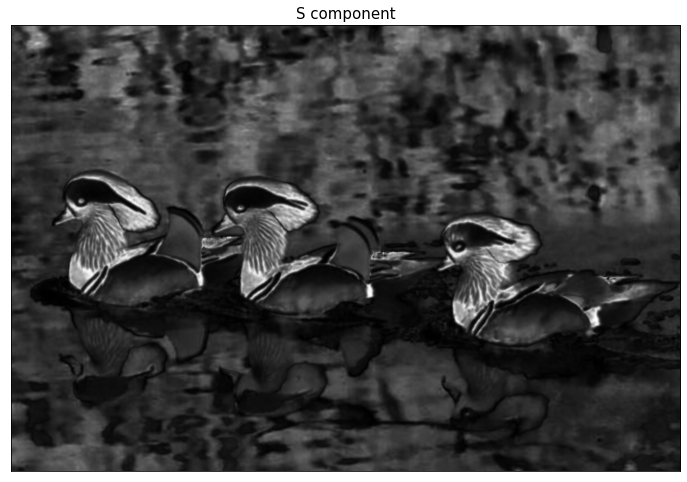

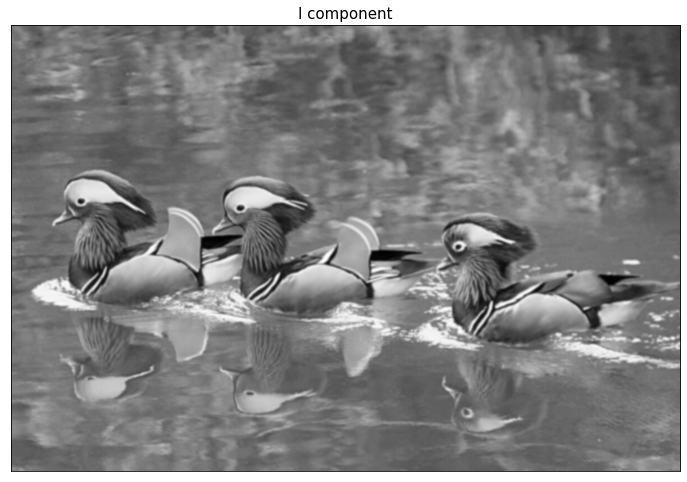

In [121]:
plt.figure(figsize=(12,12))
plt.title('HSI Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(hsi_img)
plt.show()
plt.figure(figsize=(12,12))
plt.title('H component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(h, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('S component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(s, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('I component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(i, cmap = 'gray')
plt.show()

In [122]:
## Sharpen images with kernal
kernal = np.array(([-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]))

shrp_RGB = cv2.filter2D(img, -1, kernal)
shrp_HSI = cv2.filter2D(hsi_img, -1, kernal)

## Convert HSI to RGB
shrp_HSI2RGB = np.copy(img)
h_ = (shrp_HSI[:,:,0] / 255.0) * 2*math.pi
s_ =  shrp_HSI[:,:,1] / 255.0
i_ =  shrp_HSI[:,:,2] / 255.0

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if (h_[i][j] >= 0 and h_[i][j] < 2*math.pi / 3):
      B = i_[i][j] * (1 - s_[i][j])
      R = i_[i][j] * (1 + s_[i][j]*math.cos(h_[i][j]) / math.cos(math.pi/3 - h_[i][j]))
      G = 3 * i_[i][j] - (R + B)
    elif (h_[i][j] >= 2*math.pi / 3 and h_[i][j] < 4*math.pi / 3):
      h_[i][j] = h_[i][j] - 2*math.pi / 3
      R = i_[i][j] * (1 - s_[i][j])
      G = i_[i][j] * (1 + s_[i][j]*math.cos(h_[i][j]) / math.cos(math.pi/3 - h_[i][j]))
      B = 3 * i_[i][j] - (R + G)
    elif (h_[i][j] >= 4*math.pi / 3 and h_[i][j] < 2*math.pi):
      h_[i][j] = h_[i][j] - 4*math.pi / 3
      G = i_[i][j] * (1 - s_[i][j])
      B = i_[i][j] * (1 + s_[i][j]*math.cos(h_[i][j]) / math.cos(math.pi/3 - h_[i][j]))
      R = 3 * i_[i][j] -(G + B)

    shrp_HSI2RGB[i, j, 0] = B * 255.0
    shrp_HSI2RGB[i, j, 1] = G * 255.0
    shrp_HSI2RGB[i, j, 2] = R * 255.0

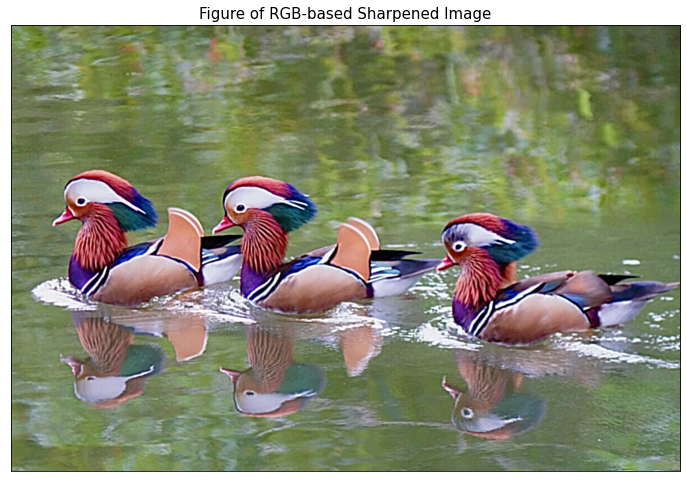

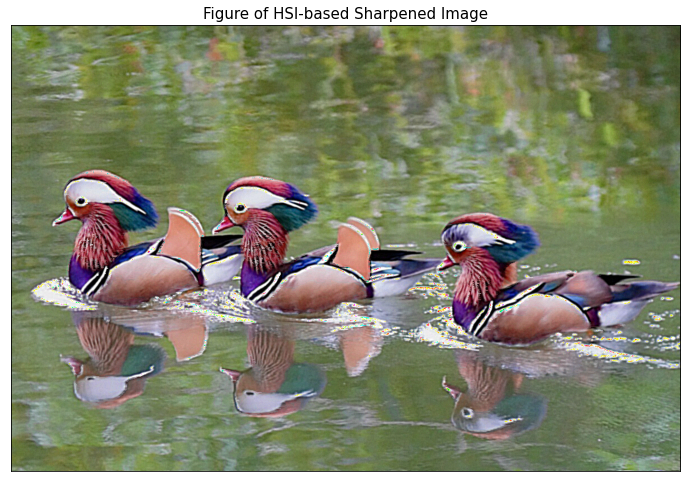

In [123]:
plt.figure(figsize=(12,12))
plt.title('Figure of RGB-based Sharpened Image', fontsize = 15), plt.xticks([]), plt.yticks([])
show_shrp_RGB = cv2.cvtColor(shrp_RGB, cv2.COLOR_BGR2RGB)
plt.imshow(show_shrp_RGB)
plt.show()
plt.figure(figsize=(12,12))
plt.title('Figure of HSI-based Sharpened Image', fontsize = 15), plt.xticks([]), plt.yticks([])
show_shrp_HSI2RGB = cv2.cvtColor(shrp_HSI2RGB, cv2.COLOR_BGR2RGB)
plt.imshow(show_shrp_HSI2RGB)
plt.show()